# Voronoi-Otsu-labeling
This workflow for image segmentation is a bit more involved that combining Gaussian blur and Otsu's threshold method. It's still a common classical approach to nuclei segmentation in microscopy images. It can also segment object pairs that are densely sticking. It cannot deal with large groups of cells.

A nuclei marker such as nuclei-GFP, DAPI or histone-RFP in combination with various microscopy techniques can be used to generate images of suitable kind.

In [1]:
from skimage.io import imread, imshow
import pyclesperanto_prototype as cle
import napari_segment_blobs_and_things_with_membranes as nsbatwm

To demonstrate the workflow, we're using image data from the [Broad Bio Image Challenge](https://bbbc.broadinstitute.org/BBBC022):
We used image set BBBC022v1 [Gustafsdottir et al., PLOS ONE, 2013](http://dx.doi.org/10.1371/journal.pone.0080999), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012](http://dx.doi.org/10.1038/nmeth.2083).

C:\Users\rober\AppData\Local\Temp\ipykernel_28972\1612493996.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(cropped_image, cmap='Greys_r')
C:\Users\rober\miniforge3\envs\bio11\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


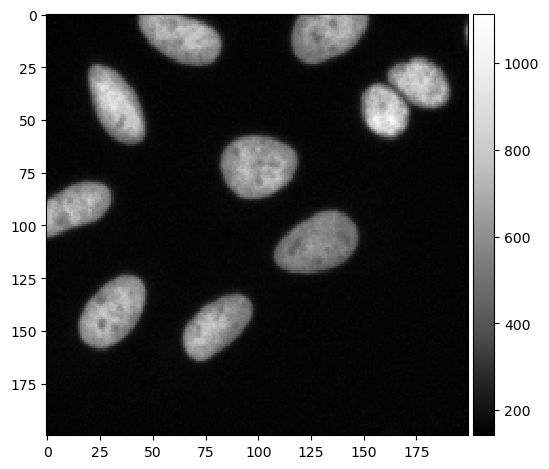

In [2]:
input_image = imread("data/BBBC022/IXMtest_A02_s9.tif")[:,:,0]

cropped_image = input_image[0:200, 200:400]

imshow(cropped_image, cmap='Greys_r')

## Applying the algorithm
Voronoi-Otsu-labeling is a segmentation algorithm, which asks for two sigma parameters. The first sigma controls how close detected cells can be (`spot_sigma`) and second controls how precise segmented objects are outlined (`outline_sigma`). This is the algorithm implemented in the [napari-segment-blobs-and-things-with-membranes](https://github.com/haesleinhuepf/napari-segment-blobs-and-things-with-membranes):


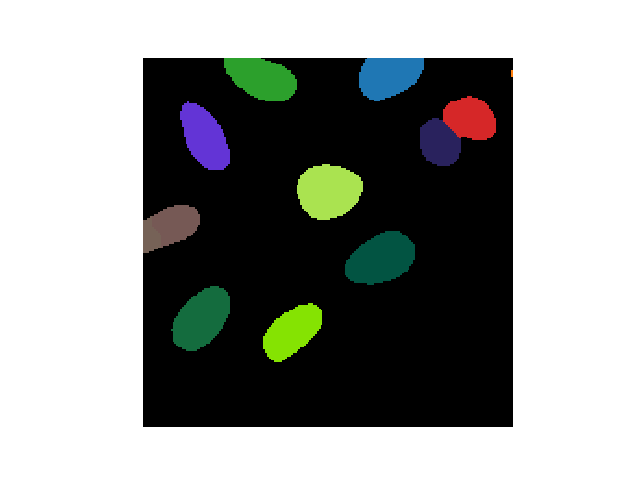

nsbatwm made made image 
 
 shape (200, 200) 
 dtype int32 
 size 156.2 kB 
 min 0 max 12 n labels 12
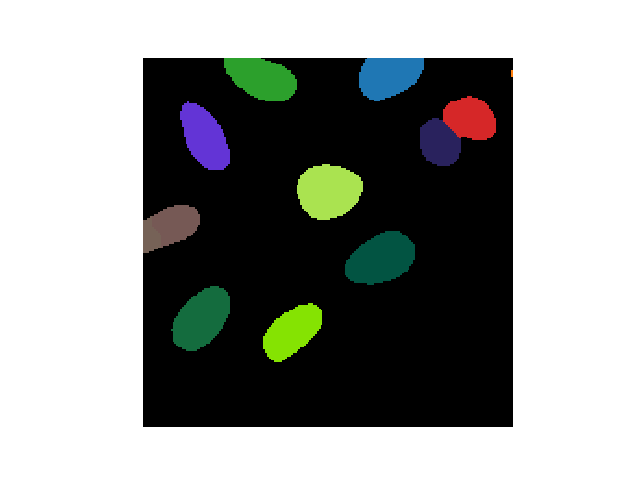

In [3]:
label_image = nsbatwm.voronoi_otsu_labeling(cropped_image, 
                                        spot_sigma=5, 
                                        outline_sigma=1)

label_image

The algorithm is also implemented in the [pyclesperanto](https://github.com/clesperanto/pyclesperanto_prototype/) library:

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
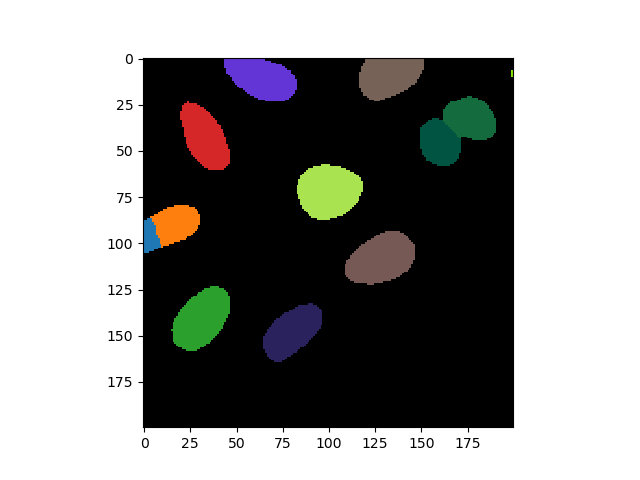

In [4]:
label_image = cle.voronoi_otsu_labeling(cropped_image, 
                                        spot_sigma=5, 
                                        outline_sigma=1)

label_image

As you can see, the result is almost identical but not equal. Depending on who developed the code and what underlying technology was applied, implementations of algorithms can differ.

For reading more about how the algorithm works, please refer to [this external notebook](https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/20_image_segmentation/11_voronoi_otsu_labeling.html).

## Exercise
Load the `blobs.tif` example dataset from last week - without moving the file! Apply the two algorithms Gauss-Otsu-Labeling and Voronoi-Otsu-Labeling to it. Get the number of objects from both images in a variable and print out the variable.

Optional: Write a function that loads the image, segments it and returns the number of objects.